# Shape from Shading experiments

According to all these trials, single light source should be diffused to avoid the hard shadow. The albedo image should light up whole region without any shadow, and this will be used as a base to separate the geometry from slope images.
One more thing noticed or realized, as gradient operation is a type of high pass filter, therefore, large region reflection is filtered out as low frequency.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

from skimage.transform.integral import integral_image

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls

SfS.ipynb  albedo.JPG down.JPG   left.JPG


In [3]:
def show_img(imgs):
    f = plt.figure()
    for i in range(len(imgs)):
        f.add_subplot(1,len(imgs), i+1)
        plt.imshow(imgs[i], cmap='gray')
    plt.show(block=True)

In [4]:
# top = cv2.imread("top.JPG", cv2.IMREAD_GRAYSCALE)
# right = cv2.imread("right.JPG", cv2.IMREAD_GRAYSCALE)
left = cv2.imread("left.JPG", cv2.IMREAD_GRAYSCALE)
down = cv2.imread("down.JPG", cv2.IMREAD_GRAYSCALE)
albedo = cv2.imread("albedo.JPG", cv2.IMREAD_GRAYSCALE)

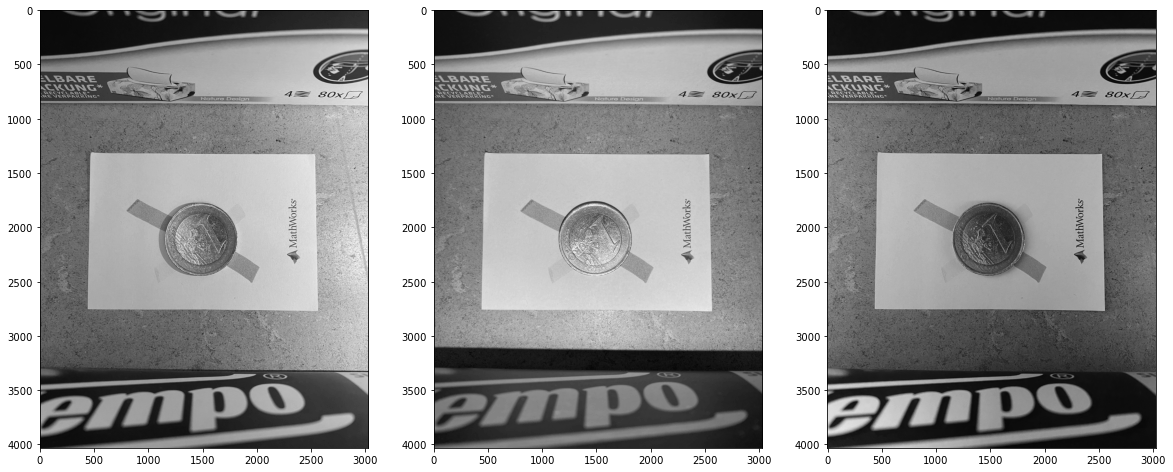

In [5]:
show_img([left, down, albedo])

In [6]:
left = left[1500:2500, 1000:2000]
down = down[1500:2500, 1000:2000]
albedo = albedo[1500:2500, 1000:2000]

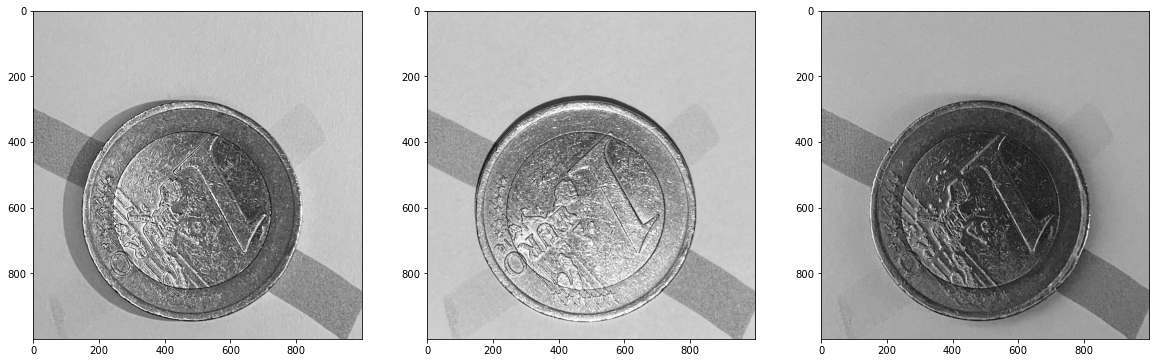

In [7]:
show_img([left, down, albedo])

In [8]:
avg_left = np.mean(left[0:200])
avg_down = np.mean(down[0:200])
avg_albedo = np.mean(albedo[0:200])
print(avg_left, avg_down, avg_albedo)

scale_x = avg_left/avg_albedo
scale_y = avg_down/avg_albedo
print(scale_x, scale_y)

195.362465 199.88576 173.64047
1.1250975363059084 1.1511473103015675


In [9]:
def normalize(img, scale):
    return (img.astype(np.float32)/scale).astype(np.int16)

In [10]:
left_norm = normalize(left, scale_x)
down_norm = normalize(down, scale_y)

avg_x = np.mean(left_norm[0:200])
avg_y = np.mean(down_norm[0:200])
print(avg_x, avg_y, avg_albedo)

173.10089 173.178 173.64047


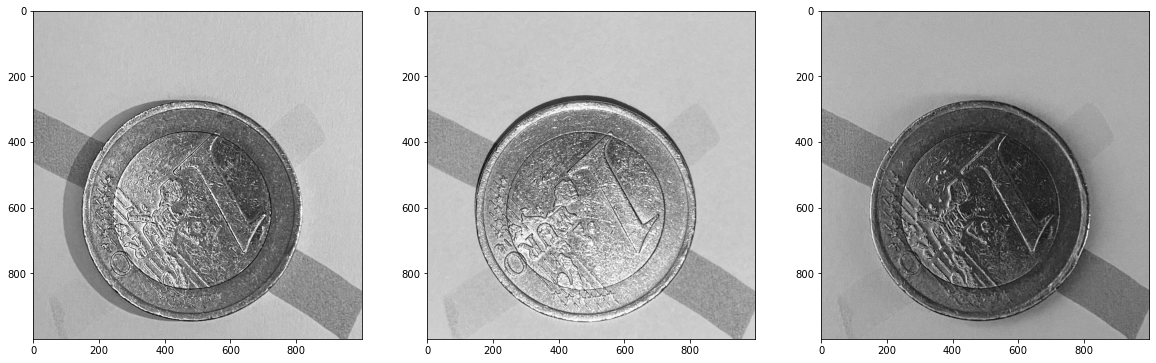

In [11]:
show_img([left_norm, down_norm, albedo])

## Op1: Subtract the albedo image from slop images

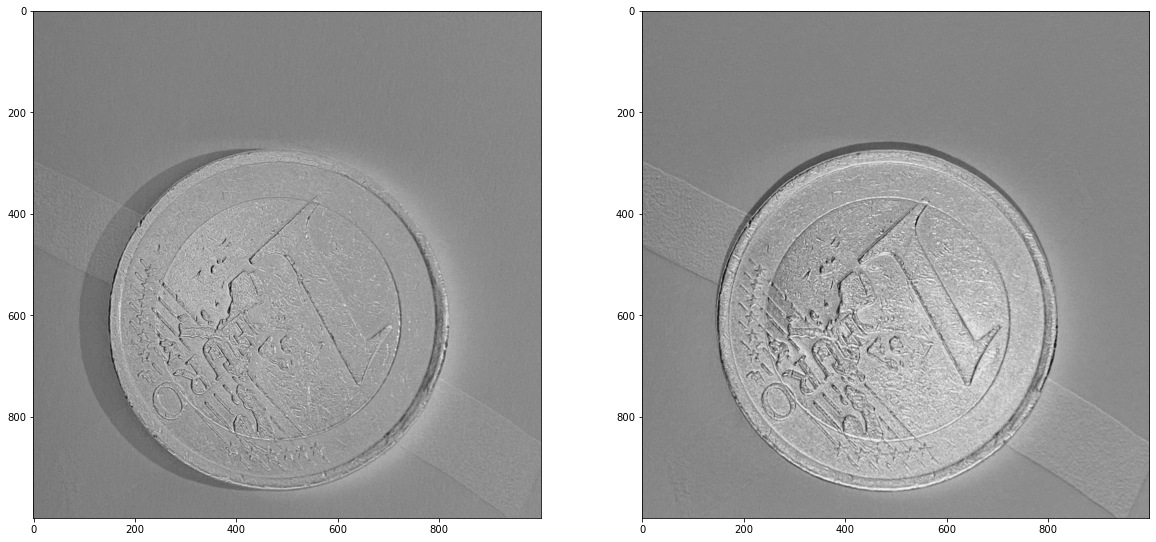

In [19]:
left_sub = left_norm-1.2*albedo
down_sub = down_norm-1.2*albedo

show_img([left_sub, down_sub])

## Op2: Subtract the xy gradient image

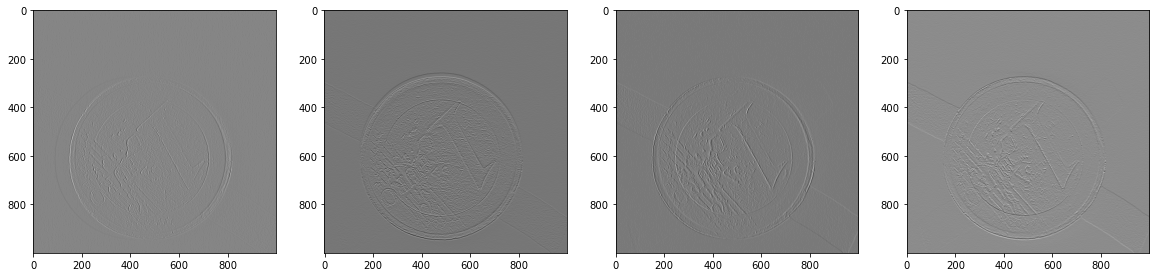

In [13]:
sobelx = cv2.Sobel(left_sub,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(down_sub,cv2.CV_64F,0,1,ksize=3)

sobelxa = cv2.Sobel(albedo,cv2.CV_64F,1,0,ksize=3)
sobelya = cv2.Sobel(albedo,cv2.CV_64F,0,1,ksize=3)

show_img([sobelx, sobely, sobelxa, sobelya])

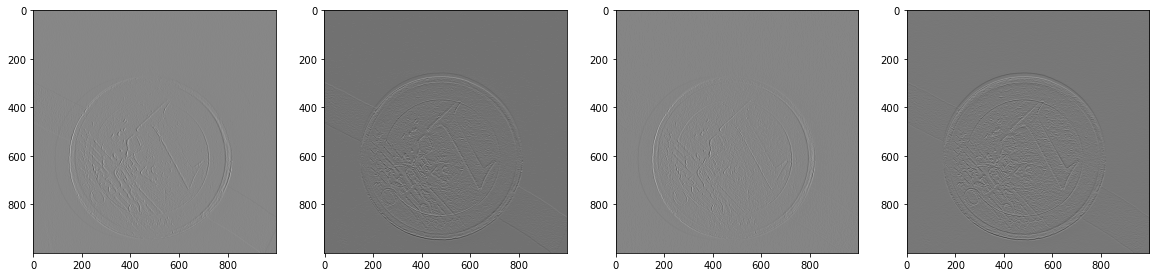

In [14]:
sobelx_org = cv2.Sobel(left,cv2.CV_64F,1,0,ksize=3)
sobely_org = cv2.Sobel(down,cv2.CV_64F,0,1,ksize=3)
show_img([sobelx-sobelxa, sobely-sobelya, sobelx_org-sobelxa, sobely_org-sobelya])

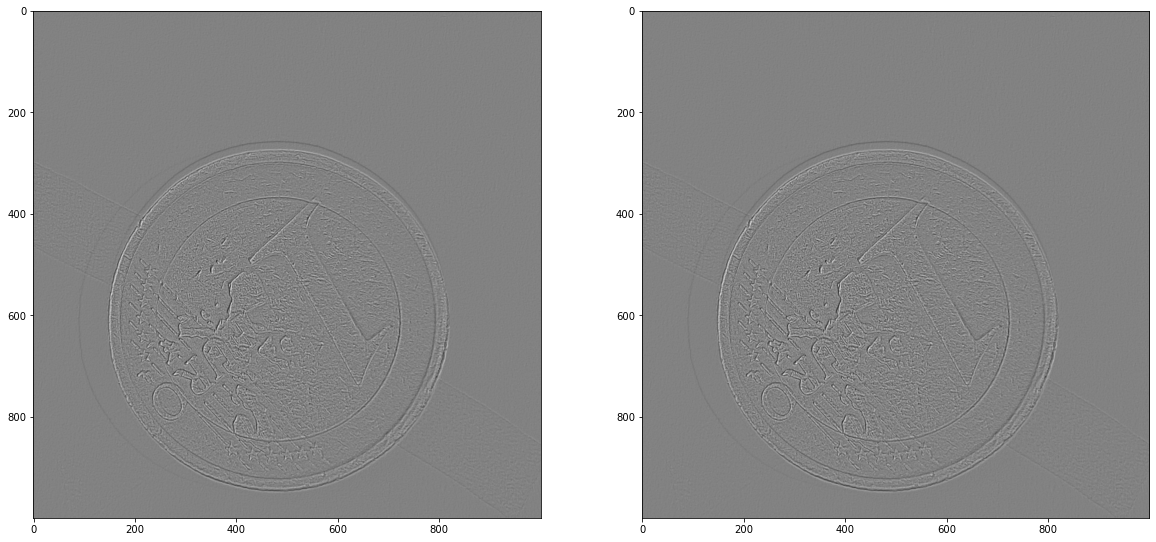

In [15]:
show_img([sobelx+sobely, sobelx_org-sobelxa+sobely_org-sobelya])